In [2]:
import os

# 获取当前工作目录
current_dir = os.getcwd()
print("当前工作目录：", current_dir)
 
# 切换到上一层目录
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
print("切换后的目录：", parent_dir)

当前工作目录： /Users/lig/Documents/GitHub/NEMESIS/unit_test
切换后的目录： /Users/lig/Documents/GitHub/NEMESIS


In [3]:
import QuantLib as ql
import pandas as pd

from devlib.utils.curve_utils import get_ois_float_rate, get_real_fixing_date
from devlib.market.curves.overnight_index_curves import Sofr
from devlib.products.rates.irs.general_irs import *

In [4]:
from nemesis.products.rates import *

####################################################################
#  ValLib ALPHA Version 0.1.0 - This build: 24 Jan 2025 at 10:42 #
####################################################################



In [5]:
today = ql.Date(27, 11, 2024)
ql.Settings.instance().evaluationDate = today

mkt_file_path = './unit_test/data/sofr_curve_data_20241127.xlsx'
swap_mkt_data = pd.read_excel(mkt_file_path, sheet_name='swap')
fixing_data = pd.read_excel(mkt_file_path, sheet_name='fixing')

index_curve = Sofr(today, swap_mkt_data=swap_mkt_data, fixing_data=fixing_data)
discount_curve = Sofr(today, swap_mkt_data=swap_mkt_data, fixing_data=fixing_data)

In [6]:
value_dt = Date(27,11,2024)
curve = OISCurve.build_curve_from_ql(value_dt, discount_curve.curve, interp_type=InterpTypes.LINEAR_ZERO_RATES)

In [7]:
payment_dates = ql_date_to_date(discount_curve.curve.dates())[1:]

In [8]:
curve.df(Date(9,12,2024), day_count=DayCountTypes.ACT_365L)

0.9984711445673076

In [9]:
curve._df_to_zero([curve.df(Date(9,12,2024), day_count=DayCountTypes.ACT_365L), curve.df(Date(23,12,2024), day_count=DayCountTypes.ACT_365L)], [Date(9,12,2024), Date(23,12,2024)], freq_type=FrequencyTypes.CONTINUOUS, dc_type=DayCountTypes.ACT_365L)

array([0.04653827, 0.04631084])

In [10]:
curve.zero_rate(Date(23,12,2024), freq_type=FrequencyTypes.CONTINUOUS, dc_type=DayCountTypes.ACT_365L)

0.046310843046395815

In [11]:
curve.df(Date(9,12,2024), day_count=DayCountTypes.ACT_365L)

0.9984711445673076

In [12]:
curve._dfs

[1.0,
 0.9984711445673076,
 0.9975803899547443,
 0.9967065806692454,
 0.9954710397589333,
 0.9915614342646488,
 0.9881981260988755,
 0.9846534876181577,
 0.9811840211724965,
 0.9776572620865015,
 0.9742982728071459,
 0.9706720066745743,
 0.9675325481515153,
 0.9643249936647614,
 0.9609525240049575,
 0.9579391391045856,
 0.9395102726235242,
 0.9220312495434567,
 0.8885745950270484,
 0.8568702265863235,
 0.8264328815869648,
 0.7967618150029758,
 0.7678416854618956,
 0.7394605218700903,
 0.7120522232086217,
 0.6853953482855895,
 0.6342090416142612,
 0.5639358561210976,
 0.46838543453813325,
 0.3988044439013189,
 0.3459742455192977,
 0.27543896200775503,
 0.2319537573626374]

In [13]:
curve.print_table(payment_dt=payment_dates)

,Date,ZR,DF
0,09-DEC-2024,4.65383,0.998471
1,16-DEC-2024,4.65383,0.997580
2,23-DEC-2024,4.63108,0.996707
3,02-JAN-2025,4.60229,0.995471
4,03-FEB-2025,4.54874,0.991561
5,03-MAR-2025,4.51386,0.988198
6,02-APR-2025,4.48008,0.984653
7,02-MAY-2025,4.44440,0.981184
8,02-JUN-2025,4.41047,0.977657
9,02-JUL-2025,4.37963,0.974298


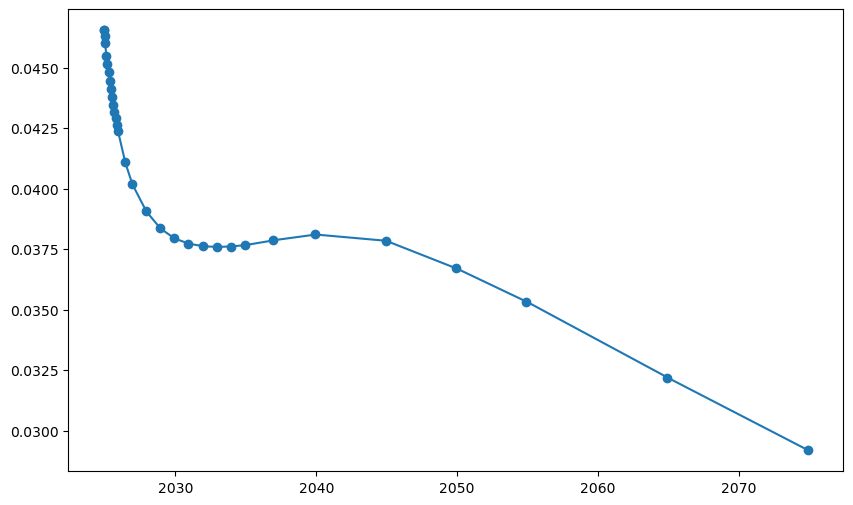

In [14]:
curve.print_figure(payment_dates)

In [15]:
fixed_type = SwapTypes.PAY
fixed_freq = FrequencyTypes.ANNUAL
fixed_dc_type = DayCountTypes.ACT_360

swap = OIS(
    effective_dt=Date(19, 7, 2024),
    term_dt_or_tenor=Date(18, 7, 2027),
    fixed_leg_type=fixed_type,
    fixed_cpn=0.05558,
    fixed_freq_type=fixed_freq,
    fixed_dc_type=fixed_dc_type,
    notional=32061781.09,
    payment_lag=0,
    float_spread=0,
    float_freq_type=FrequencyTypes.ANNUAL,
    float_dc_type=DayCountTypes.ACT_360,
    cal_type=CalendarTypes.UNITED_STATES,
    bd_type=BusDayAdjustTypes.MODIFIED_FOLLOWING,
    dg_type=DateGenRuleTypes.BACKWARD
)

In [25]:
curve.dc_type = DayCountTypes.ACT_360

In [26]:
swap.value(value_dt=value_dt, ois_curve=curve, first_fixing_rate=0.04674658104292555)

-1305252.0337037542

In [12]:
ccy = 'USD'
index_name = 'SOFR'
sch_calendar = ql.UnitedStates(ql.UnitedStates.FederalReserve)
fixing_calendar = ql.Sofr().fixingCalendar()    
payment_calendar = ql.UnitedStates(ql.UnitedStates.FederalReserve)
date_generation_rule = ql.DateGeneration.Backward
payment_delay = 0
fixing_days = 0
end_of_month = True
is_ois_leg = True

effective_date = ql.Date(19, 7, 2024)
# maturity_date = sch_calendar.advance(effective_date, ql.Period('1Y'), sch_convention)
maturity_date = ql.Date(18, 7, 2025)
fixed_leg_pay_freq = '1Y'
float_leg_pay_freq = '1Y'
reset_freq = 'None'
notional = 32061781.09
fixed_rate = 0.05558
multiplier = 1
spread = 0
fixed_leg_daycount = ql.Actual360()
float_leg_daycount = ql.Actual360()
fixed_leg_direction = 'pay'
float_leg_direction = 'receive'

In [13]:
inst = StandardFloatFixedIrs(
    ccy, index_name, effective_date, maturity_date, fixed_leg_pay_freq, 
    float_leg_pay_freq, reset_freq, notional, fixed_rate, multiplier, spread, 
    fixed_leg_daycount, float_leg_daycount, payment_delay, fixing_days, 
    sch_calendar, fixing_calendar, payment_calendar, fixed_leg_direction, 
    float_leg_direction, date_generation_rule=date_generation_rule, 
    end_of_month=end_of_month, is_ois_leg=is_ois_leg)

In [14]:
inst.float_leg.start_dates

array([Date(19,7,2024)], dtype=object)

In [15]:
inst.float_leg.end_dates

array([Date(18,7,2025)], dtype=object)

In [16]:
get_ois_float_rate(index_curve, today, inst.float_leg.start_dates[0], inst.float_leg.end_dates[0], ql.Actual360(), spread)

0.04674658104292555

In [17]:
calendar = ql.UnitedStates(ql.UnitedStates.FederalReserve)

In [18]:
last_reset_date = calendar.advance(inst.float_leg.end_dates[0], ql.Period('-1D'))

In [19]:
last_fixing_date = get_real_fixing_date(index_curve, last_reset_date)

In [20]:
today

Date(27,11,2024)

In [21]:
calendar.adjust(today, ql.Preceding)

Date(27,11,2024)

In [22]:
def get_forward_rate(index_curve, today, fixing_date, use_last_fixing=False, product_type='linear'):
    if today < index_curve.today:
        raise Exception('Valuation date should not be earlier than curve date!')
    
    try:
        rate = index_curve.get_forward_rate(today, fixing_date)
    except:
        index = index_curve.index
        curve= index_curve.curve
        freq = index.tenor()
        calendar = index.fixingCalendar()
        daycount = index.dayCounter()
        convention = index.businessDayConvention()
        end_of_month = index.endOfMonth()
        
        # settlement_delay = 0 
        settlement_delay = index.fixingDays()
        default_compounding_method = ql.Simple
        
        real_fixing_date = get_real_fixing_date(index_curve, fixing_date, product_type=product_type)
            
        if real_fixing_date <= today:
            if real_fixing_date <= index_curve.today:
                # history fixing data exist
                rate = index.fixing(real_fixing_date)
            else:
                # real_fixing_date > index_curve.today, so fixing data does not exist
                if use_last_fixing:
                    last_fixing_date = calendar.adjust(index_curve.today, ql.Preceding)
                    rate = index.fixing(last_fixing_date)
                else:
                    real_date = calendar.advance(
                        real_fixing_date, ql.Period(settlement_delay, ql.Days))
                    real_end_date = calendar.advance(real_date, freq, convention, end_of_month)
                    rate = curve.forwardRate(
                        real_date, real_end_date, daycount, default_compounding_method).rate()
        else:
            real_date = calendar.advance(
                real_fixing_date, ql.Period(settlement_delay, ql.Days))
            real_end_date = calendar.advance(real_date, freq, convention, end_of_month)
            rate = curve.forwardRate(
                real_date, real_end_date, daycount, default_compounding_method).rate()
                
    # print(f'fixing date: {str(fixing_date.to_date())}, reset rate: {rate}')
    
    return rate

In [23]:
def get_fixing_rates(index_curve, today, fixing_dates, use_last_fixing=False, product_type='linear'):
    rate_list = []
    for fixing_date in fixing_dates:
        rate = get_forward_rate(index_curve, today, fixing_date, 
                                use_last_fixing=use_last_fixing, product_type=product_type)
        rate_list.append(rate)
    
    return np.array(rate_list)

In [24]:
fixed_dates = np.array([today])

In [25]:
fixed_dates = np.array(
    ql.Schedule(inst.float_leg.start_dates[0], today, ql.Period('1D'), 
                calendar, ql.Following, ql.Preceding, 
                ql.DateGeneration.Forward, False))

In [26]:
fixed_rates = get_fixing_rates(index_curve, today, fixed_dates, use_last_fixing=False)

In [27]:
fixed_rates

array([0.0534, 0.0533, 0.0534, 0.0534, 0.0535, 0.0535, 0.0533, 0.0533,
       0.0538, 0.0535, 0.0535, 0.0532, 0.0533, 0.0533, 0.0534, 0.0534,
       0.0534, 0.0534, 0.0533, 0.0535, 0.0532, 0.0532, 0.0532, 0.0531,
       0.0531, 0.0533, 0.0534, 0.0535, 0.0535, 0.0533, 0.0532, 0.0534,
       0.0535, 0.0535, 0.0534, 0.0534, 0.0533, 0.0532, 0.0533, 0.0533,
       0.0538, 0.0538, 0.0533, 0.0482, 0.0483, 0.0483, 0.0484, 0.0484,
       0.0483, 0.0484, 0.0496, 0.0505, 0.0492, 0.0485, 0.0483, 0.0483,
       0.0484, 0.0483, 0.0482, 0.0481, 0.0486, 0.0486, 0.0485, 0.0484,
       0.0482, 0.0483, 0.0483, 0.0483, 0.0483, 0.0482, 0.0482, 0.0481,
       0.049 , 0.0486, 0.0482, 0.0482, 0.0481, 0.0482, 0.046 , 0.046 ,
       0.0459, 0.0458, 0.0457, 0.0457, 0.0457, 0.0456, 0.0457, 0.0457,
       0.0458, 0.0458, 0.0457])

In [28]:
next_reset_date = calendar.advance(today, ql.Period('1D'))
future_forward_rate = index_curve.curve.forwardRate(
    next_reset_date, inst.float_leg.end_dates[0], ql.Actual360(), ql.Simple).rate()
rate_array = np.append(fixed_rates, future_forward_rate)
reset_dates = np.append(fixed_dates, [next_reset_date, inst.float_leg.end_dates[0]])

In [29]:
reset_period_dcf = np.array(
            [ql.Actual360().yearFraction(reset_dates[i], reset_dates[i+1]) 
                for i in range(np.size(reset_dates) - 1)])
float_rate = ((np.prod(rate_array * reset_period_dcf + 1) - 1)
                / np.sum(reset_period_dcf))

In [30]:
reset_period_dcf

array([0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00833333, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.01111111, 0.00277778, 0.00277778, 0.00277778, 0.00833333,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00833333,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00833333,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00833333,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00833333,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.01111111,
       0.00277778, 0.00277778, 0.00277778, 0.00833333, 0.00277778,
       0.00277778, 0.00277778, 0.00277778, 0.00833333, 0.00277778,
       0.00277778, 0.00277778, 0.00277778, 0.00833333, 0.00277

In [31]:
float_rate

0.04674658104292555

In [32]:
cal = ql.UnitedStates(ql.UnitedStates.FederalReserve)

In [33]:
cal.holidayList(ql.Date(1,1,2028), ql.Date(31,12,2028))

(Date(17,1,2028),
 Date(21,2,2028),
 Date(29,5,2028),
 Date(19,6,2028),
 Date(4,7,2028),
 Date(4,9,2028),
 Date(9,10,2028),
 Date(23,11,2028),
 Date(25,12,2028))

In [34]:
cal.isHoliday(ql.Date(3,6,2026))

False